In [15]:
import numpy as np
import pandas as pd

In [16]:
def uvd(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02): # alpha = learning rate; beta = regularizing parameter
    Q = Q.T
    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i,j] > 0:
                    eij = R[i,j] - np.dot(P[i,:],Q[:,j])
                    for k in range(K):
                        P[i,k] = P[i,k] + alpha * (2 * eij * Q[k,j] - beta * P[i,k])
                        Q[k,j] = Q[k,j] + alpha * (2 * eij * P[i,k] - beta * Q[k,j])
        eR = np.dot(P,Q)
        e = 0
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i,j] > 0:
                    e = e + pow(R[i,j] - np.dot(P[i,:],Q[:,j]), 2)
                    for k in range(K):
                        e = e + (beta/2) * (pow(P[i,k],2) + pow(Q[k,j],2))
        if e < 0.001:
            break
    return P, Q.T

In [30]:
ratings_list = [i.strip().split("::") for i in open('ml-1m/ratings.dat', 'r').readlines()]
ratings = np.array(ratings_list)
ratings_df = pd.DataFrame(ratings_list, columns = ['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype = int)
R_df = ratings_df.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
#R_df.head()

In [31]:
R = R_df.values.astype(int)

In [32]:
(n,m)=R.shape

In [33]:
k=2

In [34]:
P = np.random.rand(n,k) 
Q = np.random.rand(m,k)

U, V = uvd(R, P, Q, k)

KeyboardInterrupt: 

In [3]:

R = [[5,3,0,1],[4,0,0,1],[1,1,0,5],[1,0,0,4],[0,1,5,4],] #A sparse matrix with missing values as '0'
R = np.array(R)
R

array([[5, 3, 0, 1],
       [4, 0, 0, 1],
       [1, 1, 0, 5],
       [1, 0, 0, 4],
       [0, 1, 5, 4]])

In [12]:
N = len(R)
M = len(R[0])
K = 3

#assigning random matrices for P and Q
P = np.random.rand(N,K) 
Q = np.random.rand(M,K)

nP, nQ = uvd(R, P, Q, K)
nR = np.dot(nP, nQ.T)
nR

array([[4.98462359, 2.96490741, 3.73715891, 1.00495724],
       [3.97494646, 1.80526135, 3.44877326, 1.00332815],
       [1.01473383, 0.96548324, 2.65073505, 4.97297649],
       [0.99170912, 1.19038283, 2.03105115, 3.98324267],
       [3.67034712, 1.0365041 , 4.97945137, 3.98321582]])

In [13]:
nP

array([[ 0.08624478,  1.73048454,  1.5348144 ],
       [ 0.35714109,  0.91971254,  1.47299301],
       [ 1.79174321,  0.80246409, -0.31713439],
       [ 1.30849322,  0.96295196, -0.34458169],
       [ 1.78726304,  0.418178  ,  1.37051094]])

In [14]:
nQ

array([[ 0.3476859 ,  1.22025614,  1.85234325],
       [-0.02241674,  1.3953771 ,  0.35975831],
       [ 1.43236899,  0.71633603,  1.54677733],
       [ 2.3409243 ,  0.81426936, -0.39484632]])

# Iris data set

In [17]:
from sklearn import datasets

In [18]:
iris = datasets.load_iris()

In [19]:
x=iris.data

In [20]:
y=iris.target

In [21]:
n,m=x.shape

In [22]:
k=2

In [23]:
#assigning random matrices for P and Q
P = np.random.rand(n,k) 
Q = np.random.rand(m,k)

U, V = uvd(R, P, Q, k)
#nR = np.dot(nP, nQ.T)
#nR

In [25]:
V

array([[ 0.80496475,  1.9430626 ],
       [ 0.41577076,  0.98303553],
       [ 1.69356566,  1.90616947],
       [ 2.57447814, -0.49606594]])

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

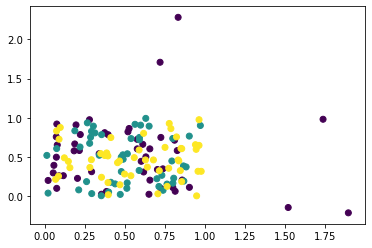

In [28]:
plt.scatter(U[:,0],U[:,1],c=y)
plt.show()